In [1]:
import matplotlib
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

import campaignlabprojects as clp

sns.set(color_codes=True)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Read in election and demographic data

In [2]:
parties = ['lab','con','ld','ukip','grn','snp','pc']
colors = ['r','b','y','m','g','y','g']

In [3]:
elections = clp.read_in_election_results()
census    = clp.read_in_census()

In [4]:
features = ['c11PopulationDensity',
            'c11HouseOwned',
            'c11CarsNone',
            'c11EthnicityWhite',
            'c11Unemployed',
            'c11Retired',
            'c11FulltimeStudent',
            'c11Age65to74',
            'c11DeprivedNone']
demographic_data = census[features]

# Display functions

In [5]:
import geopandas as gpd

map_df = gpd.read_file("data/map.shp")
map_df.index = census.index

def highlight_map(constits):
    highlight_map = map_df
    highlight_map['color'] = 0.9
    N = len(constits)
    for i,constit in enumerate(constits):
        highlight_map.loc[constit,'color'] = i*0.5/N
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax = highlight_map.plot(column=highlight_map['color'],ax=ax,linewidth=0.1)
    ax.set_axis_off()

In [6]:
def graph_results(constits, years):
    if type(constits) == str:
        constits = [constits]
    if type(years) == int:
        years = [years]
    fig, ax = plt.subplots(len(constits),len(years),
                           figsize=(5*len(years),5*len(constits)),
                           sharey=True)

    for i,constit in enumerate(constits):
        name = id_to_name(constit)
        for j,year in enumerate(years):
            if len(constits) == 1:
                elections[year][parties].loc[constit].plot.bar(color=colors,
                    title=name+' 20'+str(year),ax=ax[j])
            else:
                elections[year][parties].loc[constit].plot.bar(color=colors,
                    title=name+' 20'+str(year),ax=ax[i,j])
               

In [7]:
def onsids(coi_names):
    coi_onsids = []
    for constit in coi_names:
        coi_onsids += [onsid_from_name(constit,elections[19])]
    return coi_onsids

def id_to_name(onsid):
    mask = elections[19].index == onsid
    return elections[19]['Constituency'][mask].values[0]

# Show constituencies

Declare the constituencies the constituencies of interest (`coi`), that you want to inspect.

Define a list of ONS IDS, or pass a list of contituency names through the function `onsids()`, see below examples. Different datasets like to call constituencies slightly different names so I suggest you use the ONSID.

In [8]:
# Declare constituencies of interest here

# If you have the name enter on this line:
# coi = onsids(['Chorley','Reading East','Bradford West'])
# It is safer to enter their ONSID:
#
coi = ['W07000078', 'W07000073', 'E14000986', 'E14000812', 'E14001024','W07000043']
#coi = ['E14000634', 'E14000621', 'E14000692', 'E14000558', 'E14000599',
#       'E14000861']

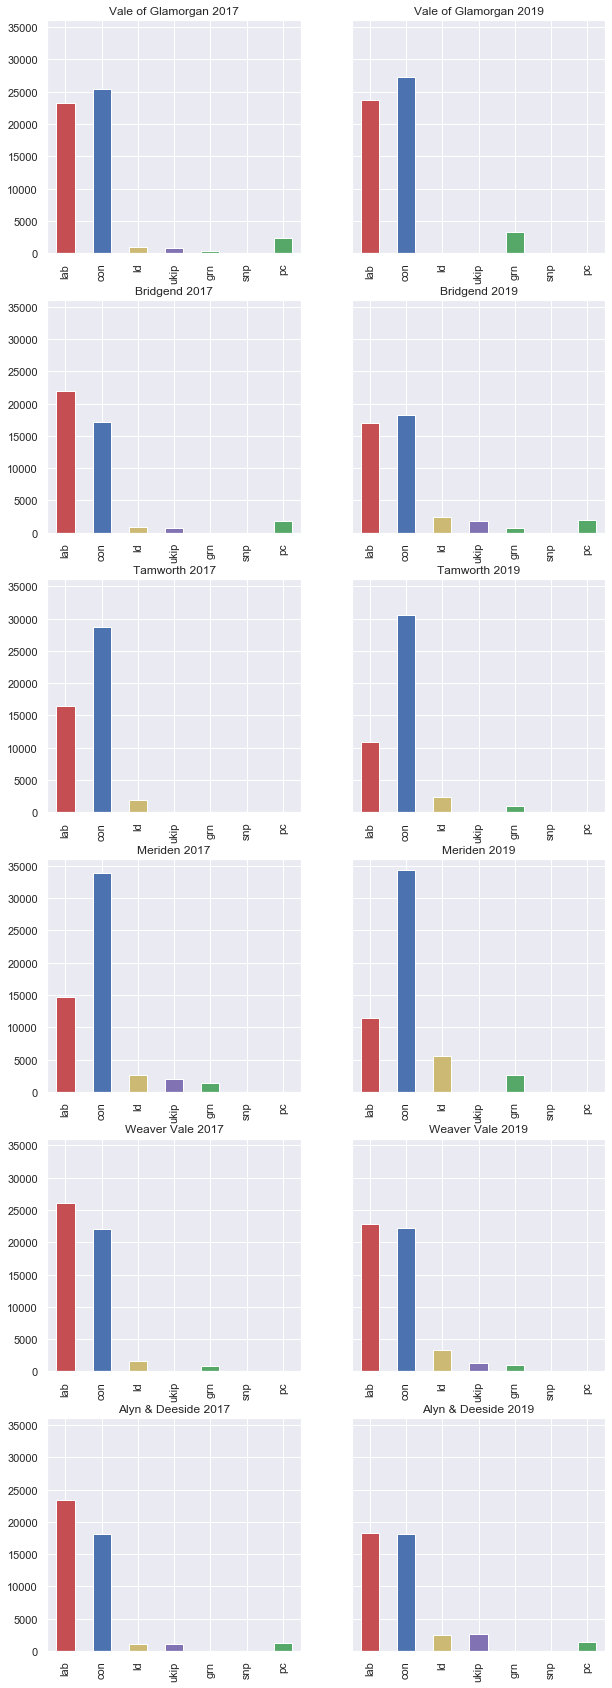

In [9]:
graph_results(coi,[17,19])

In [10]:
census[features].loc[coi]

,c11PopulationDensity,c11HouseOwned,c11CarsNone,c11EthnicityWhite,c11Unemployed,c11Retired,c11FulltimeStudent,c11Age65to74,c11DeprivedNone
ons_id,,,,,,,,,
W07000078,3.101293,71.396171,19.758566,96.809675,4.642732,16.061266,6.973934,9.716268,43.592245
W07000073,9.431565,72.242867,20.151043,97.184280,4.275648,16.771596,6.331576,9.830606,42.004316
E14000986,5.305633,70.192457,18.641969,96.652821,4.223458,15.117546,6.182328,9.257977,43.104071
E14000812,7.416675,68.680819,22.231095,91.871645,5.053089,15.992069,6.722528,9.881602,43.299838
E14001024,5.304242,69.767943,18.343832,97.637224,4.402516,15.486842,6.218225,8.881680,45.894578
W07000043,5.327371,72.592550,17.077352,98.217078,3.938911,15.543573,6.429499,9.420035,43.926890


In [11]:
elections[19].loc[coi]

,Constituency,PANO,ons_id,Constituency.1,Region,Estimated declaration time,Day,Day/Time,con,lab,ld,grn,snp,pc,ukip,UKIP,other,Registered Voters,Turnout,total,con_pc,lab_pc,ld_pc,grn_pc,snp_pc,pc_pc,ukip_pc,other_pc,Election Year,winner
ons_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
W07000078,Vale of Glamorgan,589.0,W07000078,Vale of Glamorgan,Wales,2:00,5-Friday,5-Friday 02:00,27305.0,23743.0,NaN,3251.0,NaN,NaN,NaN,NaN,508.0,"76,508",71.64%,54807.0,0.498203,0.433211,NaN,0.059317,NaN,NaN,NaN,0.009269,2019,con
W07000073,Bridgend,94.0,W07000073,Bridgend,Wales,3:00,5-Friday,5-Friday 03:00,18193.0,17036.0,2368.0,815.0,NaN,2013.0,1811.0,NaN,0.0,"63,303",66.72%,42236.0,0.430746,0.403353,0.056066,0.019296,NaN,0.047661,0.042878,0.000000,2019,con
E14000986,Tamworth,562.0,E14000986,Tamworth,West Midlands,2:00,5-Friday,5-Friday 02:00,30542.0,10908.0,2426.0,935.0,NaN,NaN,NaN,814.0,431.0,"71,580",64.34%,45242.0,0.675081,0.241103,0.053623,0.020667,NaN,NaN,NaN,0.009527,2019,con
E14000812,Meriden,392.0,E14000812,Meriden,West Midlands,3:30,5-Friday,5-Friday 03:30,34358.0,11522.0,5614.0,2667.0,NaN,NaN,NaN,NaN,0.0,"85,368",63.44%,54161.0,0.634368,0.212736,0.103654,0.049242,NaN,NaN,NaN,0.000000,2019,con
E14001024,Weaver Vale,607.0,E14001024,Weaver Vale,North West,4:30,5-Friday,5-Friday 04:30,22210.0,22772.0,3300.0,1051.0,NaN,NaN,1380.0,NaN,0.0,"70,551",71.88%,50713.0,0.437955,0.449037,0.065072,0.020724,NaN,NaN,0.027212,0.000000,2019,lab
W07000043,Alyn & Deeside,10.0,W07000043,Alyn & Deeside,Wales,3:00,5-Friday,5-Friday 03:00,18058.0,18271.0,2548.0,NaN,NaN,1453.0,2678.0,NaN,0.0,"62,783",68.50%,43008.0,0.419875,0.424828,0.059245,NaN,NaN,0.033784,0.062267,0.000000,2019,lab


In [12]:
elections[17].loc[coi]

,PANO,Constituency,Surname,First name,Party,Party Identifer,Valid votes,Election Year,total_votes,ukip,ukip_pc,ld,ld_pc,lab,lab_pc,con,con_pc,snp,snp_pc,grn,grn_pc,pc,pc_pc,winner
ons_id,,,,,,,,,,,,,,,,,,,,,,,,
W07000078,589,Vale of Glamorgan,BEAVAN,Camilla,Welsh Labour / Llafur Cymru,Labour,23311,2017,53718,868.0,0.016158,1020.0,0.018988,23311.0,0.433951,25501.0,0.474720,0.0,0.0,419.0,0.007800,2295.0,0.042723,con
W07000073,94,Bridgend,MOON,Madeleine,Welsh Labour/Llafur Cymru,Labour,21913,2017,43255,781.0,0.018056,919.0,0.021246,21913.0,0.506600,17213.0,0.397942,0.0,0.0,0.0,0.000000,1783.0,0.041221,lab
E14000986,562,Tamworth,HAMMOND,Andrew,Labour Party Candidate,Labour,16401,2017,47110,0.0,0.000000,1961.0,0.041626,16401.0,0.348143,28748.0,0.610231,0.0,0.0,0.0,0.000000,0.0,0.000000,con
E14000812,392,Meriden,MCNEIL,Thomas Benjamin,Labour Party Candidate,Labour,14675,2017,54643,2016.0,0.036894,2663.0,0.048735,14675.0,0.268561,33873.0,0.619896,0.0,0.0,1416.0,0.025914,0.0,0.000000,con
E14001024,607,Weaver Vale,AMESBURY,Mike,Labour Party,Labour,26066,2017,50613,0.0,0.000000,1623.0,0.032067,26066.0,0.515006,22138.0,0.437398,0.0,0.0,786.0,0.015530,0.0,0.000000,lab
W07000043,10,Alyn and Deeside,TAMI,Mark Richard,Welsh Labour/Llafur Cymru,Labour,23315,2017,44760,1117.0,0.024955,1077.0,0.024062,23315.0,0.520889,18080.0,0.403932,0.0,0.0,0.0,0.000000,1171.0,0.026162,lab


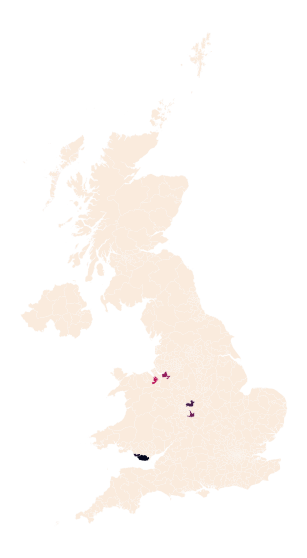

In [13]:
highlight_map(coi)